In real-world data is messy and often times has missing values which is causing problems when it comes to do analysis on data. Before starting any research on a dataset, missing values has to be checked. 

There are many ways to handle mising data. I will demostrate it in a toy dataset which we will create. Specifically, we will answer the following questions in this post.

- What is missing data and types of missing values? 
- How to detect missing values?
- How to handle missing values? 

Following packages will be used in this tutorial. If you don't have any of these, just *pip install {package name}.*

In [1]:
# This piece of code block the warning messages
import warnings 
warnings.filterwarnings('ignore')

# Import libraries and check the versions
import pandas as pd
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.17.0
Pandas version 0.24.2
Matplotlib version 2.1.2
Missingno version 0.4.2


Numpy, pandas and matplotlib are commonly used by people in data science. In this post, we will use two packages that you might not have in your system. However, they are easy to install. Just uncomment the package you are missing below and run the cell. Once you install, go back to previous cell and import the all packages and make sure you have everthing installed. 

In [2]:
# !pip install pandas_profiling
# !pip install missingno

First we will create a toy dataset has some missing values.

In [3]:
data = {'name': ['Michael', 'Jessica', 'Sue', 'Jake', 'Amy', 'Tye'],
        'gender':[None,'F',np.NaN,'F',np.NaN, 'M'],
        'height': [123, 145, 100 , np.NaN, None, 150],
        'weight': [10, np.NaN , 30, np.NaN, None, 20],
        'age': [14, None, 29 , np.NaN, 52, 45],
        }
df = pd.DataFrame(data, columns = ['name','gender', 'height', 'weight', 'age'])
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


### What is missing data and types of missing values? 

<h3>Missing data in a dataset is the value that has no computational value.</h3>

Missing data can usually be classified into: 

A. <b> Missing Completely at Random (MCAR): </b>
If missingness doesn’t depend on the values of the data set.
e.g. You removed 10% of the respondents data randomly.

B. <b> Missing at Random (MAR): </b>
If missingness depend on the observed Value.
e.g. For example, people who come from poorer families might be less inclined to answer questions about drug use, and so the level of drug use is related to family income.

C. <b> Not Missing at Random (NMAR): </b>
If missingness depends on the unobserved values of the data set.
e.g. if students skipped a question in a questionnaire where they were asked to tell whether or not they used drugs because they feared that they would be expelled from school.


Missing data in a dataset is the value that has no computational value.If you noticed, we created two types of missing values in our toy dataset. *None* and *np.Nan*. Difference between *None* and *NaN(Not a Number)* is that *None* is the Pythonic way of representing missing values and *NaN* is much more known by other systems. 

The nice thing is that Pandas has built to handle both of these data types. On the other hand, NumPy has special built-in functions to handle missing data. Let's see an example below.

In [4]:
# create a numpy array that has missing value
a = np.array([1,2,np.nan, 4])
a.dtype

dtype('float64')

In [5]:
# sum doesn't work how it is expected
np.sum(a)

nan

In [6]:
# use nansum for expected result
np.nansum(a)

7.0

### How to detect missing values in Pandas?

I will show three ways that I find useful to identify missing values in a dataset.

1- .info(), isnull() and notnull() are useful to detect missing values

In [7]:
# .info() is general information about a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
name      6 non-null object
gender    3 non-null object
height    4 non-null float64
weight    3 non-null float64
age       4 non-null float64
dtypes: float64(3), object(2)
memory usage: 320.0+ bytes


In [8]:
# sum of the missing values in each column
df.isnull().sum()

name      0
gender    3
height    2
weight    3
age       2
dtype: int64

In [9]:
# notnull() is opppsite of isnull()
df.notnull().sum()

name      6
gender    3
height    4
weight    3
age       4
dtype: int64

2- [Missingno][1] is a great package to qucikly display missing values in a dataset. More examples and features can be found in its [github repo][1].

[1]:https://github.com/ResidentMario/missingno

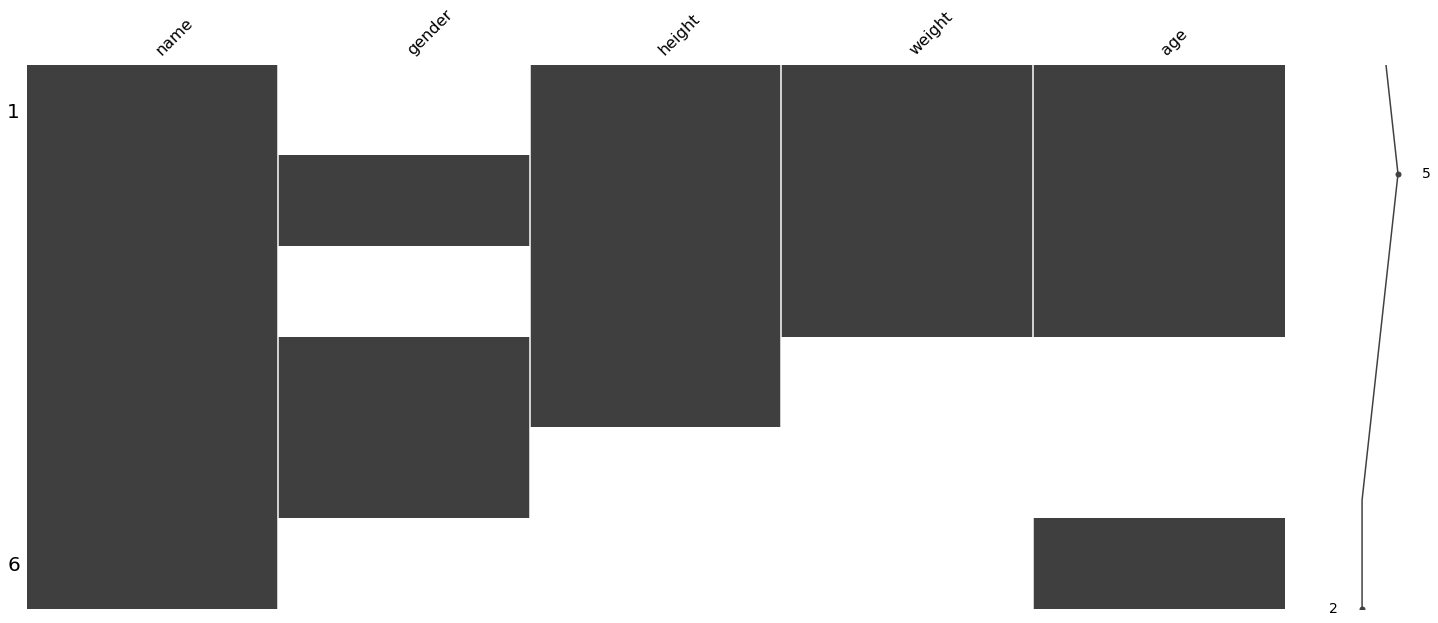

In [10]:
msno.matrix(df.sample(6));

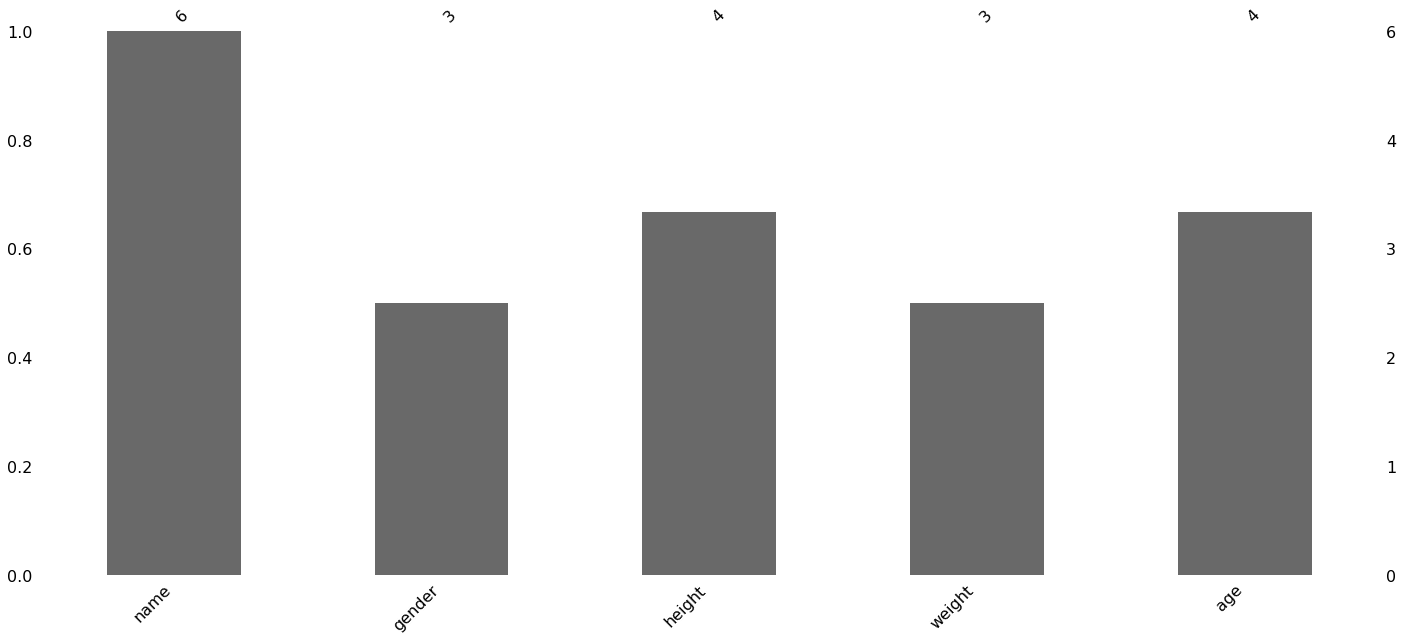

In [11]:
msno.bar(df.sample(6))

### How to handle missing values? 

<h3> Common Methods </h3>

1. <b> Do Nothing </b>
That’s an easy one. You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false). 

1. <b> Listwise Deletion: </b> Delete all data from any participant with missing values. If your sample is large enough, then you likely can drop data without substantial loss of statistical power. Be sure that the values are missing at random and that you are not inadvertently removing a class of participants.

2. <b> Recover the Values: </b> You can sometimes contact the participants and ask them to fill out the missing values. For in-person studies, we’ve found having an additional check for missing values before the participant leaves helps

3. <b> Fill with 0, previous row observation or Next row observation <b>

<h3> Imputation </h3>
Imputation is replacing missing values with substitute values. The following methods use some form of imputation.

3. <b> Educated Guessing-Most Frequent: </b> It sounds arbitrary and isn’t your preferred course of action, but you can often infer a missing value. For related questions, for example, like those often presented in a matrix, if the participant responds with all “4s”, assume that the missing value is a 4.Works Well with categorical data.It dosen't take corellation into account and can lead to Bais.

4. <b> Average Imputation:Mean </b> Use the average value of the responses from the other participants to fill in the missing value. If the average of the 30 responses on the question is a 4.1, use a 4.1 as the imputed value. This choice is not always recommended because it can artificially reduce the variability of your data but in some cases makes sense.Doesn;t take colrellation into account.

5. <b> Common-Point Imputation:Median </b> For a rating scale, using the middle point or most commonly chosen value. For example, on a five-point scale, substitute a 3, the midpoint, or a 4, the most common value (in many cases). This is a bit more structured than guessing, but it’s still among the more risky options. Use caution unless you have good reason and data to support using the substitute value.

6. <b> regression imputation: </b>
Regression imputation which tries to predict the missing values by regressing it from other related variables in the same dataset.

7. <b> Imputation Using k-NN </b>
The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.




Easiest way is to get rid of the rows/columns that have missing values. Pandas built-in function *dropna()* is for that. Pandas does not allow a single cell deletion. Either all row or all column has to be removed. 

One thing to keep in my mind is that *dropna()* has a parameter called *inplace=False* which protects dataset from the changes. If *inplace=True*, then changes will apply to the dataset right away.

In [12]:
# original dataset has not changed
df.dropna()

,name,gender,height,weight,age
5,Tye,M,150.0,20.0,45.0


In [13]:
# parameter axis=1 deletes the columns
df.dropna(axis = 1)

,name
0,Michael
1,Jessica
2,Sue
3,Jake
4,Amy
5,Tye


In some cases, you won't want to lose any data in a dataaset. In that case, use *fillna()*. How to fill the missing values is up to you. I will show a few ways below.

In [14]:
# fills all the missing values with the spcified value, inplace is False.
df['age'].fillna(0)

0    14.0
1     0.0
2    29.0
3     0.0
4    52.0
5    45.0
Name: age, dtype: float64

*ffill* means forward-fill. Here we filled the index row 2 with the previous value which F. On the other hand, first row has no previous row to copy data from. Therefore, it remained *None*. 

In [15]:
# inplace = False
df['gender'].fillna(method='ffill')

0    None
1       F
2       F
3       F
4       F
5       M
Name: gender, dtype: object

To overcome this there is *bfill* parameter stands for back-fill works opposite way of *ffill* which perfectly covers all our missing values in the *gender* column. 

In [16]:
# inplace is True. Changes has applied to the dataset.
df['gender'].fillna(method='bfill', inplace=True)

The other way of is fillig missing is using the mean value of certain rows/columns. For example, we filled missing values in the height column with each gender's mean value. You could use *median*, *mode* etc.

In [17]:
df['height'].fillna(df.groupby('gender')['height'].transform('mean'), inplace=True)

This time, we will fill the weight column with the median of all values in that columns

In [18]:
df['weight'].fillna(df['weight'].median(), inplace=True)

In [19]:
# only age column has missing values
df.isnull().sum()

name      0
gender    0
height    0
weight    0
age       2
dtype: int64

Another way to fill missing data is *interpolation*. This method allows you to fill the missing values depending upon with the previous and the next values. In our example, mising values filled linearly by default. 

In [20]:
df['age'].interpolate(inplace=True)

Our toy dataset has finally completed and has no missing value.

In [21]:
df

,name,gender,height,weight,age
0,Michael,F,123.000000,10.0,14.0
1,Jessica,F,145.000000,20.0,21.5
2,Sue,F,100.000000,30.0,29.0
3,Jake,F,122.666667,20.0,40.5
4,Amy,M,150.000000,20.0,52.0
5,Tye,M,150.000000,20.0,45.0


Let's see that we have no missing data, anymore.

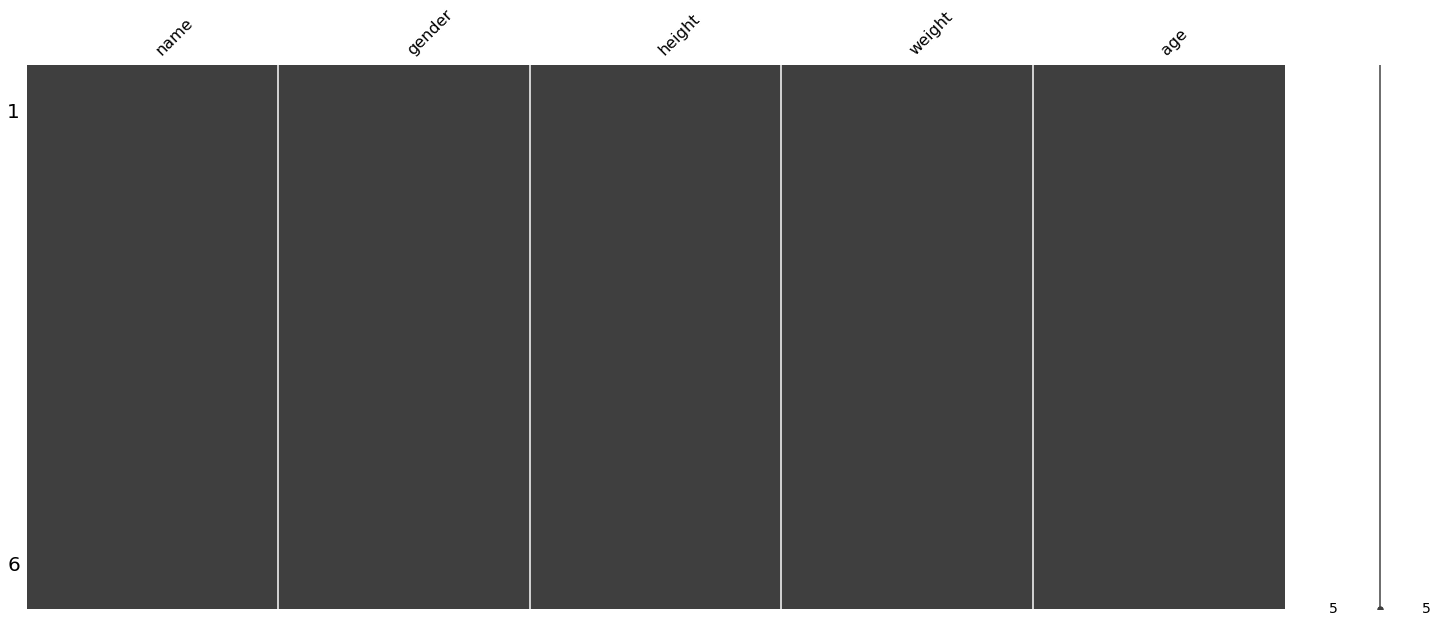

In [22]:
msno.matrix(df)

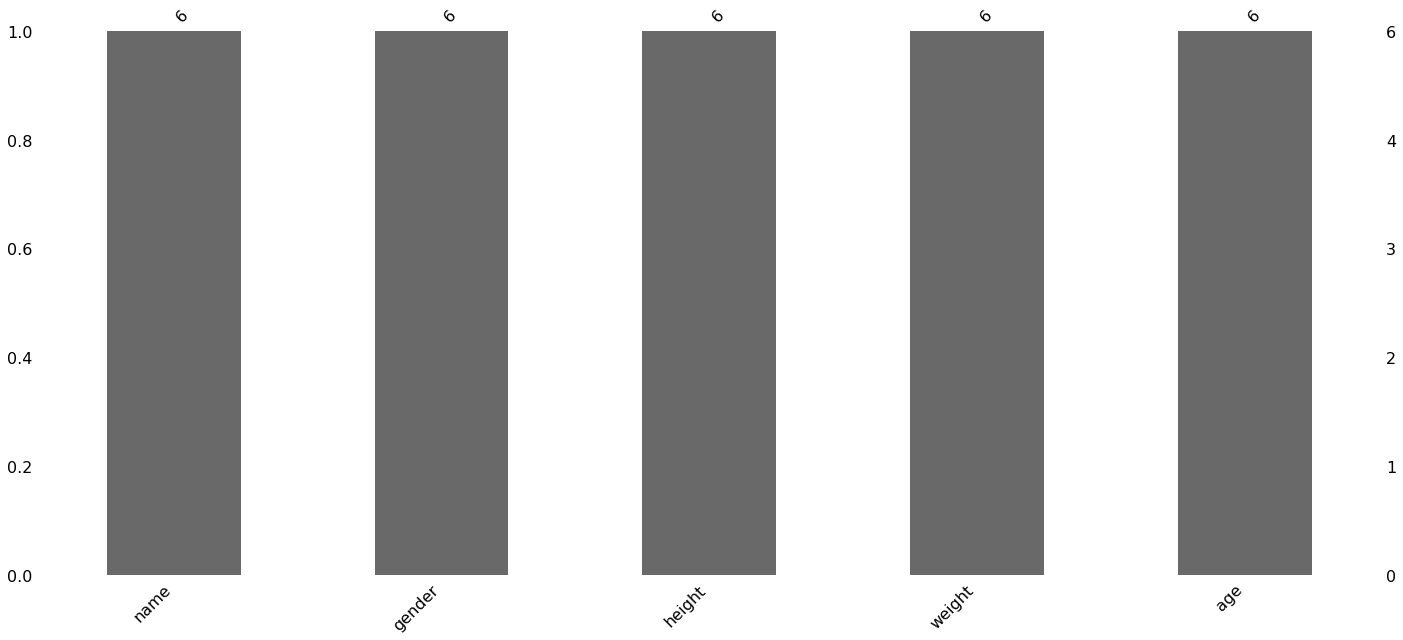

In [23]:
msno.bar(df)

<h3> Imputation Using Multivariate Imputation by Chained Equation (MICE) </h3>
 
 This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.
 
<h3> Imputation Using Deep Learning (Datawig): </h3>
This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

### Further Learning

[Pandas documentation][7] for working with missing data. 

Find more about [Interpolation here.][6]

[Handling missing data][1] by Jake VanderPlas

[Missing Data In Pandas Dataframes][2] by Chris Albon

[How to Handle Missing Data with Python][3] by Jason Brownlee




[1]: https://www.oreilly.com/learning/handling-missing-data
[2]: https://chrisalbon.com/python/pandas_missing_data.html
[3]: http://machinelearningmastery.com/handle-missing-data-python
[4]:https://github.com/numanyilmaz/MissingData
[6]:http://pandas.pydata.org/pandas-docs/stable/missing_data.html#interpolation
[7]:http://pandas.pydata.org/pandas-docs/stable/missing_data.html